In [1]:
import sys
import numpy as np

print("Python: {}".format(sys.version))
print("Numpy: {}".format(np.__version__))

Python: 3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]
Numpy: 1.14.5


In [10]:
from numpy import linalg

In [40]:
# define an array
A = np.arange(9) - 3
A

array([-3, -2, -1,  0,  1,  2,  3,  4,  5])

In [41]:
# reshape into a 3x3 matrix
B = A.reshape((3,3))
B

array([[-3, -2, -1],
       [ 0,  1,  2],
       [ 3,  4,  5]])

In [42]:
# Euclidian L2 Norm = default
print(np.linalg.norm(A))
print(np.linalg.norm(B))

8.306623862918075
8.306623862918075


In [43]:
# The Frobenius norm is the L2 norm for a Matrix
print(np.linalg.norm(B, 'fro'))

8.306623862918075


In [44]:
# The Max Norm P= infinity
print(np.linalg.norm(A, np.inf))
print(np.linalg.norm(B, np.inf))

5.0
12.0


In [45]:
# vector normalization - normalization to produce a unit vector
norm = np.linalg.norm(A)
A_unit = A / norm

print(A_unit)

[-0.36115756 -0.24077171 -0.12038585  0.          0.12038585  0.24077171
  0.36115756  0.48154341  0.60192927]


In [46]:
# The magnitude of a unit vector is = 1 - defining characteristic of a unit vector.
np.linalg.norm(A_unit)

1.0

### Eigendecomposition

Eigenvalues and eigenvectors are easy to find with Python and NumPy. Remember, an eigenvector of a square matrix $\textbf{A}$ is a nozero vector $\textbf{v}$ such that multiplication by $\textbf{A}$ alters only the scale of $\textbf{v}$ 
$$\textbf{Av} = \lambda\textbf{v} $$ The scalar $\lambda$ is known as the eigenvalue corresponding to this eigenvector.

In [17]:
# find the eigenvalues and eigenvectors for a simple square matrix
A = np.diag(np.arange(1,4))
A

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [18]:
eigenvalues, eigenvectors = np.linalg.eig(A)

In [19]:
# return the eigenvalues for the matrix
eigenvalues

array([1., 2., 3.])

In [20]:
# returns the eigenvectors for a matrix
eigenvectors

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [23]:
# the eigenvalue w[i] corresponds to the eigenvector v[:, i]
print("Eigenvalue: {}".format(eigenvalues[1]))
print("Eigenvector: {}".format(eigenvectors[:,1]))

Eigenvalue: 2.0
Eigenvector: [0. 1. 0.]


We can easily double check that these are the correct eigenvalues and eigenvectors, by plugging them back into the eigendecomposition equation.
The eigendecomposition of $\textbf{A}$ is given by $$\textbf{A} = \textbf{V}diag(\lambda)\textbf{V}^{-1}$$ where $\lambda$ is equal to a vector of the eigenvalues, and $\textbf{V}$ is a matrix with one eigenvector per column.

In [24]:
# verify eigendecomposition
matrix = np.matmul(np.diag(eigenvalues), np.linalg.inv(eigenvectors))
output = np.matmul(eigenvectors, matrix).astype(np.int)
print(output)

[[1 0 0]
 [0 2 0]
 [0 0 3]]


Eigenvectors and eigenvalues can often seem difficult conceptually. It is helpful to visualize the eigenvectors and their multiplication with the original matrix, $\textbf{A}$. Using matplotlib, we can accomplish this quickly.

In [29]:
# import matplotlib libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

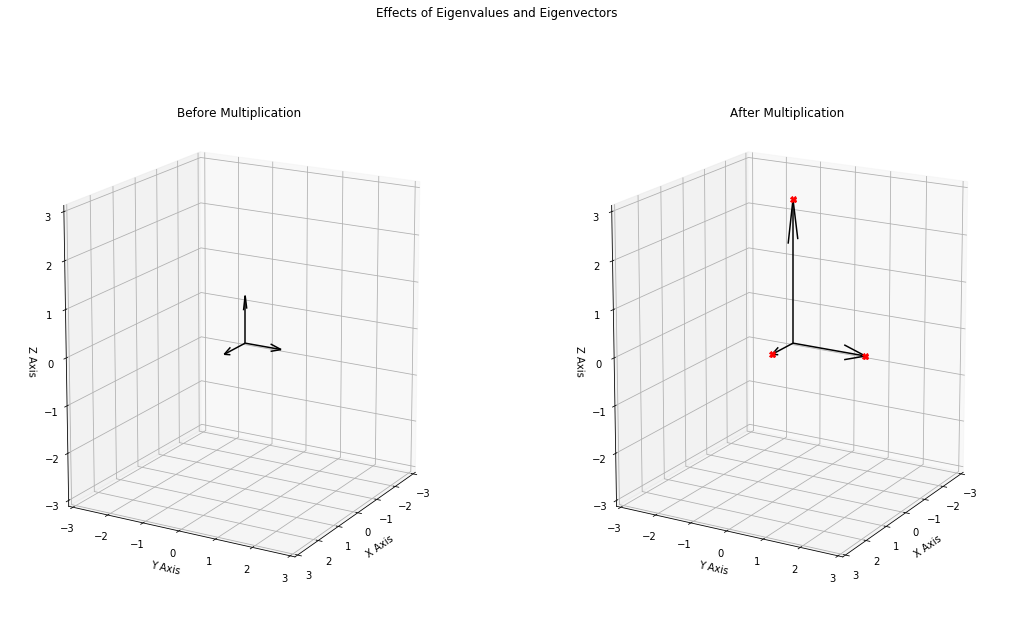

In [38]:
#plot the eigenvectors
origin = [0,0,0]

fig = plt.figure(figsize=(18,10))
fig.suptitle('Effects of Eigenvalues and Eigenvectors')
ax1 = plt.subplot(121, projection='3d')
ax1.quiver(origin, origin, origin, eigenvectors[0,:], eigenvectors[1,:], eigenvectors[2,:], color='k')
ax1.set_xlim([-3, 3])
ax1.set_ylim([-3, 3])
ax1.set_zlim([-3, 3])
ax1.set_xlabel('X Axis')
ax1.set_ylabel('Y Axis')
ax1.set_zlabel('Z Axis')
ax1.view_init(15, 30)
ax1.set_title('Before Multiplication')

# multiply original matrix by eigenvectors
new_eig = np.matmul(A, eigenvectors)
ax2 = plt.subplot(122, projection='3d')

# plot the new vectors
ax2.quiver(origin, origin, origin, new_eig[0,:], new_eig[1,:], new_eig[2,:], color='k')

# plot the eigenvalues for each vector (the amount the vector should be scaled by)
# add the eigenvalues to the plot
ax2.plot((eigenvalues[0]*eigenvectors[0]), (eigenvalues[1]*eigenvectors[1]), (eigenvalues[2]*eigenvectors[2]), 'rX')
ax2.set_xlim([-3, 3])
ax2.set_ylim([-3, 3])
ax2.set_zlim([-3, 3])
ax2.set_xlabel('X Axis')
ax2.set_ylabel('Y Axis')
ax2.set_zlabel('Z Axis')
ax2.view_init(15, 30)
ax2.set_title('After Multiplication')

# show the plot
plt.show()